Проект: A/B-тестирование.
==

## Изучение общей информации о датасетах

In [1]:
# Все импортируемые библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

! pip install -U kaleido

from plotly.subplots import make_subplots
from plotly import graph_objects as go 
from plotly.offline import plot
import plotly.express as px
import seaborn as sns

import scipy.stats as stats
import math as mth

import warnings
warnings.simplefilter('ignore')

In [3]:
# Посмотрю какие есть данные

display(actions_new_users.head())
display(marketing_event.head())
display(new_users.head())
display(test_participants.head())

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [4]:
# Посмотрю информацию по типам столбцов

display('actions_new_users')
display(actions_new_users.info())

display('marketing_event')
display(marketing_event.info())

display('new_users')
display(new_users.info())

display('test_participants')
display(test_participants.info())

'actions_new_users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

'marketing_event'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

'new_users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

'test_participants'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

Необходимо изменить тип столбцов с датой в датасетах.

Посмотрю, за какой период есть данные по новым пользователям и совершенным ими событиям.

In [5]:
display('Минимальная дата привлечения новых пользователей:', new_users['first_date'].min())
display('Максимальная дата привлечения новых пользователей:', new_users['first_date'].max())

'Минимальная дата привлечения новых пользователей:'

'2020-12-07'

'Максимальная дата привлечения новых пользователей:'

'2020-12-23'

In [6]:
display('Минимальная дата совершения событий пользователями:',actions_new_users['event_dt'].min())
display('Максимальная дата совершения событий пользователями:',actions_new_users['event_dt'].max())

'Минимальная дата совершения событий пользователями:'

'2020-12-07 00:00:33'

'Максимальная дата совершения событий пользователями:'

'2020-12-30 23:36:33'

**Вывод**

Датасет 'actions_new_users' - содержит информацию о действиях новых пользователей. Всего в датасете 440317 строк. Есть данные за период совершения событий с 7 декабря 2020 по 30 декабря 2020 года. Имеет некорректный тип столбца с датой.

Датасет 'marketing_event' - содержит информацию о маркетинговых событиях на 2020 год. Имеет некорректный тип столбцов с датой.

Датасет 'new_users' - содержит информацию о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года. Всего в датасете 61733 строк. Имеет некорректный тип столбца с датой.

Датасет 'test_participants' - это таблица участников тестов, содержит 18268 строк.

Проведу предобработку данных.

## Предобработка данных

### Корректировка типов столбцов

In [7]:
# Преобразую типы столбцов

actions_new_users['event_dt'] = pd.to_datetime(actions_new_users['event_dt'], format='%Y-%m-%d %H:%M:%S.%f') # дата и время

marketing_event['start_dt'] = pd.to_datetime(marketing_event['start_dt'])

marketing_event['finish_dt'] = pd.to_datetime(marketing_event['finish_dt'])

new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [8]:
# Проверю

display(actions_new_users.info())
display(marketing_event.info())
display(new_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


None

### Обработка дубликатов

In [9]:
# проверю дубликаты

display(actions_new_users.duplicated().sum())
display(marketing_event.duplicated().sum())
display(new_users.duplicated().sum())
display(test_participants.duplicated().sum())

0

0

0

0

### Обработка пропущенных значений

In [10]:
# проверю пропуски

display(actions_new_users.isna().sum())
display(marketing_event.isna().sum())
display(new_users.isna().sum())
display(test_participants.isna().sum())

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

user_id       0
first_date    0
region        0
device        0
dtype: int64

user_id    0
group      0
ab_test    0
dtype: int64

In [11]:
# Посмотрю столбец с пропусками

actions_new_users['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [12]:
# Посмотрю столбец с событиями

actions_new_users['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [13]:
# Распределение пропусков по событиям

a = actions_new_users.query('details.isna()')
a.groupby('event_name')['user_id'].count()

event_name
login           189552
product_cart     62462
product_page    125563
Name: user_id, dtype: int64

### Проверка категориальных данных

In [14]:
# Посмотрю, какие есть регионы в данных

new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [15]:
# Посмотрю, какие есть девайсы в данных

new_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [16]:
# О каких тестах есть информация

test_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

**Вывод**

Была проведена следующая предобработка данных:

- Изменен тип столбцов actions_new_users ['event_dt'], marketing_event['start_dt'], marketing_event['finish_dt'], new_users['first_date'] на временной тип данных.
- Явных дубликатов не обнаружено. 
- Пропуски обнаружены в датасете с событиями, в столбце с дополнительными данными о событии. Пропусков нет только в событии 'purchase', в этом поле хранится стоимость покупки в долларах. Остальные события не подразумевают оплату.
- Есть данные по пользователям из 'EU', 'N.America', 'APAC', 'CIS'.
- Есть данные по девайсам пользователей, с которых они заходили на сайт: 'PC', 'Android', 'iPhone', 'Mac'.
- В датасете 'test_participants' хранятся данные по двум тестам: интересуещего нас 'recommender_system_test' и другого -  'interface_eu_test'.

## Проверка теста на корректность и соответствие ТЗ

### Соответствие ТЗ - название теста

Нам необходим тест recommender_system_test. Посмотрю, есть ли по нему данные и сколько их.

In [17]:
test_participants.head(3)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test


In [18]:
test_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [19]:
recommender_system_test = test_participants.query('ab_test == "recommender_system_test"')
recommender_system_test.shape[0]

6701

Данные есть, 6701 строка.

### Соответствие ТЗ - даты

По техническому заданию дата запуска теста: 2020-12-07

Дата остановки набора новых пользователей: 2020-12-21

In [20]:
#Добавлю к таблице с тестом регион пользователей, дату и девайс

user = new_users.merge(test_participants, on='user_id', how='right')

In [21]:
user_ab = user.query('ab_test=="recommender_system_test"')

In [22]:
# Для начала посмотрю, сколько изначально уникальных пользователей

user['user_id'].nunique()

16666

In [23]:
user['first_date'].max()

Timestamp('2020-12-23 00:00:00')

Максимальная дата 23 декабря, а нам нужно максимум 21 декабря. Значит, произошла ошибка при наборе нужных пользователей в тест. Удалю лишних пользователей.

In [24]:
user = user.query('first_date != "2020-12-23T00:00:00.000000000"')
user = user.query('first_date != "2020-12-22T00:00:00.000000000"')

In [25]:
# Сколько осталось

user['user_id'].nunique()

15664

In [26]:
user['first_date'].max()

Timestamp('2020-12-21 00:00:00')

### Соответствие ТЗ - 15% новых пользователей из EU

In [27]:
# Выберу нужный тест и проверю на соответствие ТЗ 15% новых пользователей из EU

recommender_system_test = user.query('ab_test == "recommender_system_test"')
recommender_system_test.head(3)

,user_id,first_date,region,device,group,ab_test
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test
1,A7A3664BD6242119,2020-12-20,EU,iPhone,A,recommender_system_test
2,DABC14FDDFADD29E,2020-12-08,EU,Mac,A,recommender_system_test


In [28]:
recommender_system_test = recommender_system_test.query('region == "EU"')
recommender_system_test.shape[0]

6351

In [29]:
new_users.groupby('region')['user_id'].nunique()

region
APAC          3153
CIS           3155
EU           46270
N.America     9155
Name: user_id, dtype: int64

In [30]:
n = new_users.query('region == "EU"')
n.shape[0]

46270

In [31]:
display('Процент новых пользователей из EU в тесте:', round((recommender_system_test.shape[0]/n.shape[0]*100),2))

'Процент новых пользователей из EU в тесте:'

13.73

После очистки пользователей по дате, процент новых пользователей из EU в тесте составляет 13.73%

### Соответствие ТЗ - аудитория теста

In [32]:
# Очищенный датасет 1 тест

recommender_system_test.head(3)

,user_id,first_date,region,device,group,ab_test
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test
1,A7A3664BD6242119,2020-12-20,EU,iPhone,A,recommender_system_test
2,DABC14FDDFADD29E,2020-12-08,EU,Mac,A,recommender_system_test


In [33]:
# Сколько в нем участников

recommender_system_test['user_id'].nunique()

6351

In [34]:
# Сколько участников во втором тесте

user_2 = user.query('ab_test=="interface_eu_test"')
user_2['user_id'].nunique()

10565

Практически в два раза больше участников во втором тесте.

In [35]:
# Сырой датасет 2 теста

user = user.query('region == "EU"')
user.head(3)

,user_id,first_date,region,device,group,ab_test
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test
1,A7A3664BD6242119,2020-12-20,EU,iPhone,A,recommender_system_test
2,DABC14FDDFADD29E,2020-12-08,EU,Mac,A,recommender_system_test


In [36]:
# Проверю, не попали ли пользователи сразу в несколько тестов

(
user
    .groupby('user_id')
    .agg({'group':'nunique'})
    .query('group>1')
).shape[0]

# Есть пересечения

776

In [37]:
# Запишу в отдельную переменную

dupl = user.groupby('user_id').agg({'group':'nunique'}).query('group>1').reset_index()
dupl.head()

,user_id,group
0,0082295A41A867B5,2
1,00E68F103C66C1F7,2
2,02313B9E82255F47,2
3,023D4A062F40F10B,2
4,040F6DD6E792D0AB,2


In [38]:
# Присоединю к тесту

recommender_system_test = recommender_system_test.merge(dupl, on='user_id', how='left')
recommender_system_test.head(3)

,user_id,first_date,region,device,group_x,ab_test,group_y
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,NaN
1,A7A3664BD6242119,2020-12-20,EU,iPhone,A,recommender_system_test,NaN
2,DABC14FDDFADD29E,2020-12-08,EU,Mac,A,recommender_system_test,NaN


In [39]:
# Посмотрю распределение этих пользователей по группам

recommender_system_test.groupby('group_x')['group_y'].count()

group_x
A    439
B    337
Name: group_y, dtype: int64

Не буду удалять этих пользователей из теста, распределение нормальное по группам.

In [40]:
# Удалю лишний столбец и переименую group

recommender_system_test.drop(columns='group_y', inplace = True)
recommender_system_test = recommender_system_test.rename(columns={'group_x':'group'})
recommender_system_test['user_id'].nunique()

6351

Проверю на пересечение по группам.

In [41]:
(
recommender_system_test
    .groupby('user_id')
    .agg({'group':'nunique'})
    .query('group>1')
).shape[0]

# Пересечений нет

0

### Соответствие ТЗ - количество участников

Ожидаемое количество участников теста: 6000. У нас 6351. Посмотрю распределение по группам.

In [42]:
recommender_system_test.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,3634
B,2717


Kоличество немного больше 6000, распределение по группам адекватное.

### Соответствие ТЗ - пересечение с маркетинговыми и другими активностями

Дата запуска теста: 2020-12-07;

Дата остановки: 2021-01-04;

Посмотрю, были ли в эти даты какие-то маркетинговые и другие активности.

In [43]:
marketing_event

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Промо Christmas&New Year Promo проводилась в том числе и в EU, в период с 25.12.2020 по 03.01.2021. Проверю, повлияло ли это на активность пользователей.

In [44]:
# Добавлю к тесту события

recommender_system_test = recommender_system_test.merge(actions_new_users[['user_id', 'event_name', 'event_dt']], on='user_id', how='left')
recommender_system_test.head(3)

,user_id,first_date,region,device,group,ab_test,event_name,event_dt
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,purchase,2020-12-07 14:43:27
1,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,purchase,2020-12-25 00:04:56
2,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,product_cart,2020-12-07 14:43:29


In [45]:
recommender_system_test['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login', nan],
      dtype=object)

Обнаружены пропуски в событиях.

In [46]:
recommender_system_test.isna().sum()

user_id          0
first_date       0
region           0
device           0
group            0
ab_test          0
event_name    2870
event_dt      2870
dtype: int64

In [47]:
user_test_nan = recommender_system_test.query('event_name.isna()')
user_test_nan.head(3)

,user_id,first_date,region,device,group,ab_test,event_name,event_dt
32,482F14783456D21B,2020-12-14,EU,PC,B,recommender_system_test,NaN,NaT
59,057AB296296C7FC0,2020-12-17,EU,iPhone,B,recommender_system_test,NaN,NaT
66,E9FA12FAE3F5769C,2020-12-14,EU,Android,B,recommender_system_test,NaN,NaT


In [48]:
# Поставлю 1 вместо пропусков для дальнейшего подсчета

user_test_nan['event_dt'] = user_test_nan['event_dt'].fillna(1)
user_test_nan.head(3)

,user_id,first_date,region,device,group,ab_test,event_name,event_dt
32,482F14783456D21B,2020-12-14,EU,PC,B,recommender_system_test,NaN,1
59,057AB296296C7FC0,2020-12-17,EU,iPhone,B,recommender_system_test,NaN,1
66,E9FA12FAE3F5769C,2020-12-14,EU,Android,B,recommender_system_test,NaN,1


In [49]:
# Посмотрю, у скольких пользователей есть пропуски в событиях

user_test_nan['user_id'].nunique()

2870

In [50]:
# Распределение пропусков по группам

user_test_nan.groupby('group')['event_dt'].sum()

group
A    1030
B    1840
Name: event_dt, dtype: int64

In [51]:
recommender_system_test.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,3634
B,2717


In [52]:
display('Процент пользователей, не совершивших действия в группе А:')
round(((user_test_nan.query('group=="A"')['event_dt'].sum())/(recommender_system_test.query('group=="A"')['user_id'].nunique())*100),2)

'Процент пользователей, не совершивших действия в группе А:'

28.34

In [53]:
display('Процент пользователей, не совершивших действия в группе В:')
round(((user_test_nan.query('group=="B"')['event_dt'].sum())/(recommender_system_test.query('group=="B"')['user_id'].nunique())*100),2)

'Процент пользователей, не совершивших действия в группе В:'

67.72

Вернусь к Промо Christmas&New Year Promo. Могла ли данная акция оказать влияние на результаты теста. Период промо с 25.12.2020 по 03.01.2021

In [54]:
user_test_a = recommender_system_test.query('group == "A"')
user_test_b = recommender_system_test.query('group == "B"')

In [55]:
recommender_system_test['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login', nan],
      dtype=object)

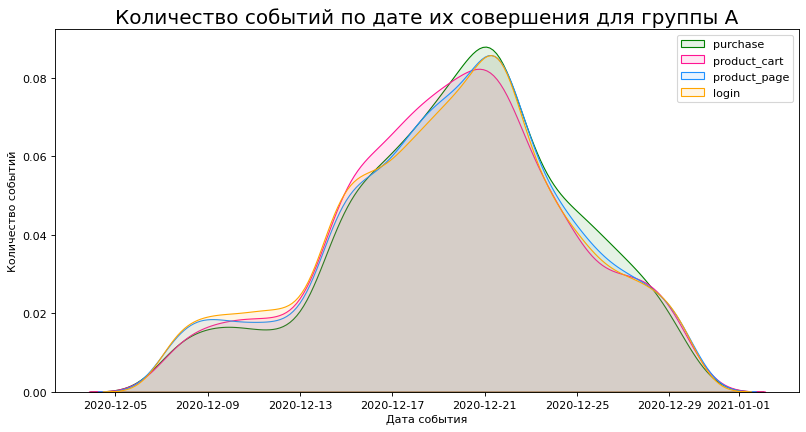

In [56]:
# Построю график распределения событий по дате их совершения для группы А

plt.figure(figsize=(12,6), dpi= 80)
sns.kdeplot(user_test_a.loc[user_test_a['event_name'] == 'purchase', "event_dt"], shade=True, color="g", label="purchase", alpha=.1)
sns.kdeplot(user_test_a.loc[user_test_a['event_name'] == 'product_cart', "event_dt"], shade=True, color="deeppink", label="product_cart", alpha=.1)
sns.kdeplot(user_test_a.loc[user_test_a['event_name'] == 'product_page', "event_dt"], shade=True, color="dodgerblue", label="product_page", alpha=.1)
sns.kdeplot(user_test_a.loc[user_test_a['event_name'] == 'login', "event_dt"],  shade=True, color="orange", label="login", alpha=.1)


plt.title('Количество событий по дате их совершения для группы А', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Дата события')
plt.legend()
plt.show()

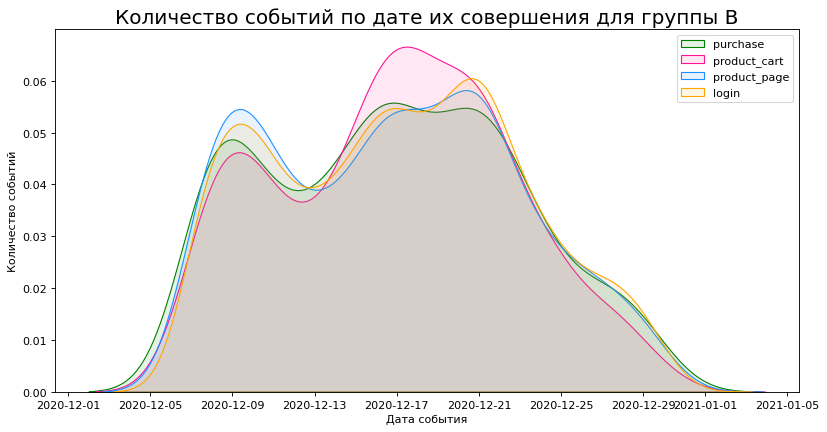

In [57]:
# Построю график распределения событий по дате их совершения для группы B

plt.figure(figsize=(12,6), dpi= 80)
sns.kdeplot(user_test_b.loc[user_test_b['event_name'] == 'purchase', "event_dt"], shade=True, color="g", label="purchase", alpha=.1)
sns.kdeplot(user_test_b.loc[user_test_b['event_name'] == 'product_cart', "event_dt"], shade=True, color="deeppink", label="product_cart", alpha=.1)
sns.kdeplot(user_test_b.loc[user_test_b['event_name'] == 'product_page', "event_dt"], shade=True, color="dodgerblue", label="product_page", alpha=.1)
sns.kdeplot(user_test_b.loc[user_test_b['event_name'] == 'login', "event_dt"],  shade=True, color="orange", label="login", alpha=.1)


plt.title('Количество событий по дате их совершения для группы B', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Дата события')
plt.legend()
plt.show()

**Вывод**

Не похоже, что промо акция могла иметь какое-то влияние на участников теста. 

### Соответствие ТЗ - ожидаемый эффект

Ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
- конверсии в просмотр карточек товаров — событие `product_page`,
- просмотры корзины — `product_cart`,
- покупки — `purchase`.

Группы: А — контрольная, B — новая платёжная воронка.

In [58]:
user_test_a.shape[0]

19339

In [59]:
# Лайфтайм

user_test_a = user_test_a[(user_test_a['event_dt']-user_test_a['first_date']).dt.days <= 14]

In [60]:
user_test_a.shape[0]

17977

In [61]:
# Группирую группу А

test_а = user_test_a.groupby('event_name')['user_id'].nunique().reset_index()

test_а.head()

,event_name,user_id
0,login,2604
1,product_cart,782
2,product_page,1685
3,purchase,833


In [62]:
user_test_b.shape[0]

6951

In [63]:
user_test_b = user_test_b[(user_test_b['event_dt']-user_test_b['first_date']).dt.days <= 14]

In [64]:
user_test_b.shape[0]

4851

In [65]:
# Группирую группу В

test_b = user_test_b.groupby('event_name')['user_id'].nunique().reset_index()
test_b.head()

,event_name,user_id
0,login,876
1,product_cart,244
2,product_page,493
3,purchase,249


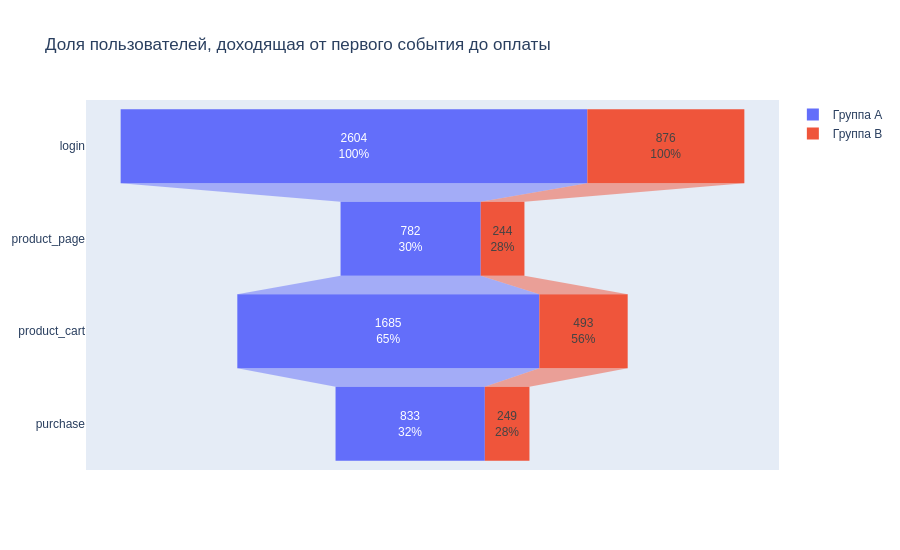

In [66]:
# Воронка конверсии по группам

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа А',
    y = ["login", "product_page", "product_cart", "purchase"],
    x = test_а['user_id'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа В',
    orientation = "h",
    y = ["login", "product_page", "product_cart", "purchase"],
    x = test_b['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial")
    )

fig.update_layout(title='Доля пользователей, доходящая от первого события до оплаты', width=900, height=550)
fig.show("png")

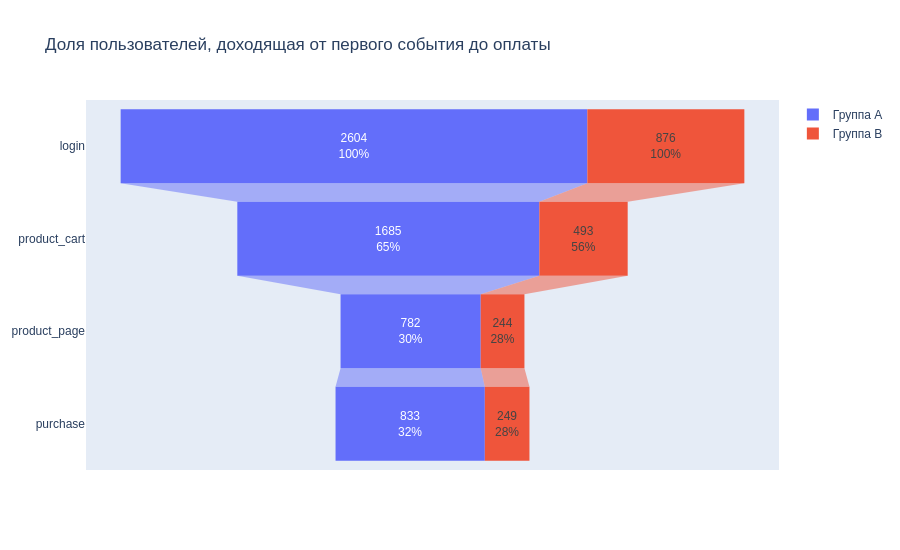

In [67]:
# Воронка конверсии по группам

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа А',
    y = ["login", "product_cart", "product_page", "purchase"],
    x = [test_а.at[0,'user_id'], test_а.at[2,'user_id'], test_а.at[1,'user_id'], test_а.at[3,'user_id']],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа В',
    orientation = "h",
    y = ["login", "product_cart", "product_page", "purchase"],
    x = [test_b.at[0,'user_id'], test_b.at[2,'user_id'], test_b.at[1,'user_id'], test_b.at[3,'user_id']],
    textposition = "inside",
    textinfo = "value+percent initial")
    )
fig.update_layout(title='Доля пользователей, доходящая от первого события до оплаты', width=900, height=550)
fig.show("png")

Ожидаемый эффект теста не достигнут. Нет улучшения конверсии на 10%. Более того, наблюдается ее снижение. По воронке можно отметить, что многие пользователи сразу переходят в корзину, без просмотра карточки товара. Вероятно, на сайте есть такая возможность.

**Вывод**

Данные не соответствуют ТЗ. Были пользователи, которые пришли в тест после 21 декабря. Их я удалила. Так же есть пересечения с другим тестом. Я проверила распределение по группам А и В таких пользователей, распределение нормальное, пользователей оставила. Но оценить влияние другого теста на текущий нет возможности. Так же есть пересечение с маркетинговой акцией. В целом, увидеть влияние акции на действие пользователей не удалось. Но быть уверенными до конца тоже невозможно. Ожидаемый эффект теста не достигнут. Нет улучшения конверсии на 10%. Более того, наблюдается ее снижение. По воронке можно отметить, что многие пользователи сразу переходят в корзину, без просмотра карточки товара. Вероятно, на сайте есть такая возможность. Пользователи составляют 13.73% новых пользователей из EU. 

Пересечений между группами нет. В тесте 6351 участник.


## Исследовательский анализ данных

### Количество событий на пользователя в выборках

In [68]:
round((user_test_a.groupby('user_id')['event_name'].count().mean()),1)

6.9

In [69]:
round((user_test_b.groupby('user_id')['event_name'].count().mean()),1)

5.5

Среднее количество событий на пользователя в группе А = 6.9, в группе В = 5.5.

### Распределение числа событий по дням

In [70]:
# Подготовлю таблицу

user_test_a['day'] = pd.to_datetime(user_test_a['event_dt']).dt.date
user_test_b['day'] = pd.to_datetime(user_test_b['event_dt']).dt.date
user_test_a.head(3)

,user_id,first_date,region,device,group,ab_test,event_name,event_dt,day
0,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,purchase,2020-12-07 14:43:27,2020-12-07
2,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,product_cart,2020-12-07 14:43:29,2020-12-07
4,D1ABA3E2887B6A73,2020-12-07,EU,PC,A,recommender_system_test,product_page,2020-12-07 14:43:27,2020-12-07


In [71]:
event_a = user_test_a.groupby('day')['event_name'].count().reset_index()
event_b = user_test_b.groupby('day')['event_name'].count().reset_index()
event_a.head(3)

,day,event_name
0,2020-12-07,318
1,2020-12-08,313
2,2020-12-09,371


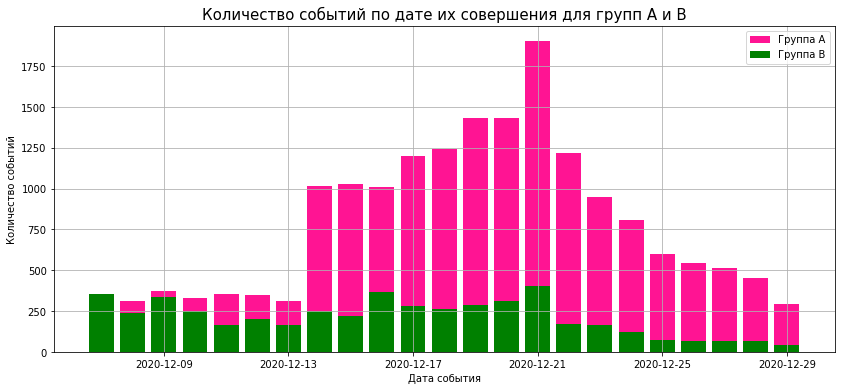

In [72]:
plt.figure(figsize=(14,6))

plt.bar(event_a['day'], event_a['event_name'], label='Группа А', color="deeppink")
plt.bar(event_b['day'], event_b['event_name'], label='Группа В', color="g")

plt.title('Количество событий по дате их совершения для групп А и В', fontsize=15)
plt.ylabel('Количество событий')
plt.xlabel('Дата события')
plt.grid()
plt.legend()
plt.show()

Виден резкий рост количества событий 21 декабря для группы А. Посмотрю, а как привлекались пользователи по датам.

In [73]:
first_date_a = user_test_a.groupby('first_date')['user_id'].nunique().reset_index()
first_date_b = user_test_b.groupby('first_date')['user_id'].nunique().reset_index()
first_date_a

,first_date,user_id
0,2020-12-07,154
1,2020-12-08,90
2,2020-12-09,81
3,2020-12-10,60
4,2020-12-11,87
5,2020-12-12,61
6,2020-12-13,52
7,2020-12-14,366
8,2020-12-15,202
9,2020-12-16,160


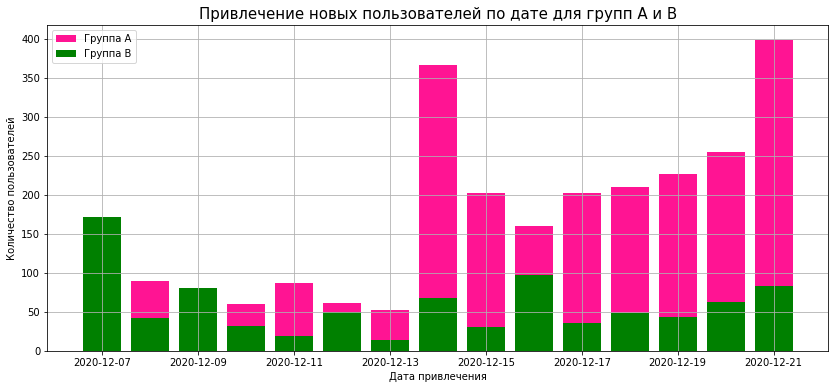

In [74]:
plt.figure(figsize=(14,6))

plt.bar(first_date_a['first_date'], first_date_a['user_id'], label='Группа А', color="deeppink")
plt.bar(first_date_b['first_date'], first_date_b['user_id'], label='Группа В', color="g")

plt.title('Привлечение новых пользователей по дате для групп А и В', fontsize=15)
plt.ylabel('Количество пользователей')
plt.xlabel('Дата привлечения')
plt.grid()
plt.legend()
plt.show()

И привлеклось 21 декабря больше всего пользователей, отсюда и рост количества событий.

### Изменение конверсии в воронке в выборках на разных этапах

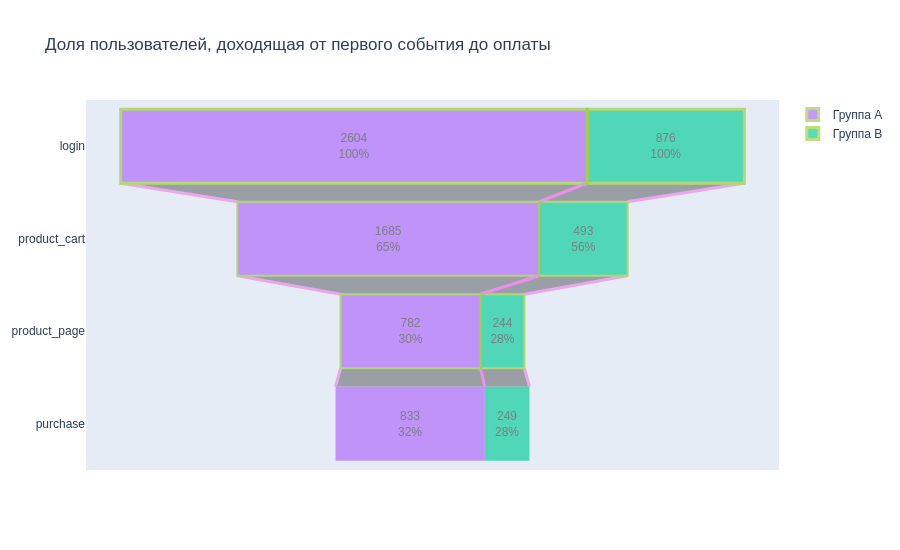

In [75]:
# Воронка конверсии по группам

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа А',
    y = ["login", "product_cart", "product_page", "purchase"],
    x = [test_а.at[0,'user_id'], test_а.at[2,'user_id'], test_а.at[1,'user_id'], test_а.at[3,'user_id']],
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#AB63FA", "#AB63FA", "#AB63FA", "#AB63FA"],
    "line": {"width": [3, 2, 2], "color": ["yellowgreen", "yellowgreen", "yellowgreen"]}},
    connector = {"line": {"color": "violet", "dash": "solid", "width": 3}}
))

fig.add_trace(go.Funnel(
    name = 'Группа В',
    orientation = "h",
    y = ["login", "product_cart", "product_page", "purchase"],
    x = [test_b.at[0,'user_id'], test_b.at[2,'user_id'], test_b.at[1,'user_id'], test_b.at[3,'user_id']],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#00CC96", "#00CC96", "#00CC96", "#00CC96"],
    "line": {"width": [3, 2, 2], "color": ["yellowgreen", "yellowgreen", "yellowgreen"]}},
    connector = {"line": {"color": "violet", "dash": "solid", "width": 3}}
)
    )
fig.update_layout(title='Доля пользователей, доходящая от первого события до оплаты', width=900, height=550)
fig.show("png")

Как мы уже видели ранее, при проверке соответствия данных ТЗ, пользователи после регистрации могут сразу попасть в корзину, не открывая карточку товара. Из корзины до оплаты доходит только 32% пользователей у контрольной группы и 28% у тестовой.

## Оценка результатов A/B-тестирования

In [76]:
# Подготовлю таблицу


recommender_system_test = recommender_system_test[(recommender_system_test['event_dt']-recommender_system_test['first_date']).dt.days <= 14]

test = recommender_system_test.pivot_table(index='group', columns = 'event_name', values = 'user_id', aggfunc = 'nunique')

# Добавлю столбец с общей численностью

test['total_number'] = recommender_system_test.groupby('group')['user_id'].nunique()
test.columns.name = None
test

,login,product_cart,product_page,purchase,total_number
group,,,,,
A,2604,782,1685,833,2604
B,876,244,493,249,877


In [77]:
# Создам переменные групп по событиям

a = test.iloc[0][[0,1,2,3,4]]
b = test.iloc[1][[0,1,2,3,4]]

Далее я буду проводить несколько проверок гипотез, проверка происходит на одних и тех же данных. Это множественный тест и с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. Чтобы повысить мощность теста я буду использовать метод Шидака. В каждом тесте alpha = 1 - (1-0.05)**(1/4)

4-это количество проверок.

In [78]:
# Функция для проведения теста

def z_value_count(purchases1, purchases2, leads1, leads2, alpha = 1 - (1-0.05)**(1/4)):
    purchases = np.array([purchases1, purchases2])
    leads = np.array([leads1,leads2])
# пропорция успехов в первой группе:
    p1 = purchases[0]/leads[0]

        # пропорция успехов во второй группе:
    p2 = purchases[1]/leads[1]

    
    print(purchases[0], purchases[1], leads[0], leads[1])
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

        # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2 

    print('p-значение: ', p_value)

    if p_value < alpha: 
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
            )

### А/B-эксперимент

**Событие: login**

- Гипотеза Н_0: Доли пользователей в группах A и B, которые зарегистрировались на сайте, равны
- Гипотеза Н_1: Доли пользователей в группах A и B, которые зарегистрировались на сайте, не равны

In [79]:
z_value_count(a[0], b[0], a[4], b[4])

2604 876 2604 877
p-значение:  0.08481837035887363
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистические критерии не находят разницу между выборками.

### А/B-эксперимент

**Событие: product_cart**

- Гипотеза Н_0: Доли пользователей в группах A и B, открывших карточку товаров, равны
- Гипотеза Н_1: Доли пользователей в группах A и B, открывших карточку товаров, не равны

In [80]:
z_value_count(a[1], b[1], a[4], b[4])

782 244 2604 877
p-значение:  0.21469192029582396
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистические критерии не находят разницу между выборками.

### А/B-эксперимент

**Событие: product_page**

- Гипотеза Н_0: Доли пользователей в группах A и B, открывших страницу показа корзины, равны
- Гипотеза Н_1: Доли пользователей в группах A и B, открывших страницу показа корзины, не равны

In [81]:
z_value_count(a[2], b[2], a[4], b[4])

1685 493 2604 877
p-значение:  6.942739359416805e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


Статистические критерии нашли разницу между выборками.

### А/B-эксперимент

**Событие: purchase**

- Гипотеза Н_0: Доли пользователей в группах A и B, открывших страницу оплаты, равны
- Гипотеза Н_1: Доли пользователей в группах A и B, открывших страницу оплаты, не равны

In [82]:
z_value_count(a[3], b[3], a[4], b[4])

833 249 2604 877
p-значение:  0.04652482738393027
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистические критерии не находят разницу между выборками.

**Вывод**

По результатам теста выявлена статистическая разница между группами в событии "показ корзины". Но т.к данные для теста собраны некорректно и не соответствуют по многим пунктам ТЗ - не советую ориентироваться на результаты теста.

## Вывод и рекомендации

1. В моем распоряжении были следующие данные: 
- техническое задание.
- датасет 'actions_new_users' - содержит информацию о действиях новых пользователей. Всего в датасете 440317 строк. Есть данные за период совершения событий с 7 декабря 2020 по 30 декабря 2020 года.
- датасет 'marketing_event' - содержит информацию о маркетинговых событиях на 2020 год. 
- датасет 'new_users' - содержит информацию о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года. Всего в датасете 61733 строк. 
- датасет 'test_participants' - это таблица участников тестов, содержит 18268 строк. 

Была проведена предобработка данных.

2. Данные не соответствуют ТЗ. 

Были пользователи, которые пришли в тест после 21 декабря. Их я удалила. 

Так же есть пересечения с другим тестом. Я проверила распределение по группам А и В таких пользователей, распределение нормальное, пользователей оставила. Но оценить влияние другого теста на текущий нет возможности. 

Так же есть пересечение с маркетинговой акцией. В целом, увидеть влияние акции на действие пользователей не удалось. Но быть уверенными до конца тоже невозможно. 

Ожидаемый эффект теста не достигнут. Нет улучшения конверсии на 10%. Более того, наблюдается ее снижение. По воронке можно отметить, что многие пользователи сразу переходят в корзину, без просмотра карточки товара. Из корзины до оплаты доходит только 32% пользователей у контрольной группы и 28% у тестовой.

Пересечений между группами нет. 

Пользователи составляют 13.73% новых пользователей из EU. 

В тесте 6351 участник.

3. По результатам теста выявлена статистическая разница между группами в событии "показ корзины". Но, т.к данные для теста собраны некорректно и не соответствуют по многим пунктам ТЗ - не советую ориентироваться на результаты теста.

4. Рекомендую провести новый, более корректный А/В тест, по которому мы сможем оценить эффективность изменений для тестовой группы.